### <span style="color:#3c2f2f;font-size:bold; float:right; ">KEYELA Patatchona, Нпммд-02-21</span>

# Моделирование беспроводных сетей
## Лабораторная работа № 2

# Задание 1
Сгенерировать выборку случайных чисел размером 100 и 1000 для двух
распределений – экспоненциального и нормального. Для созданных выборок сделать
следующее:
1. Посчитать выборочное среднее и дисперсию, сравнить с математическим
ожиданием соответствующих распределений;
2. Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими
значениями;
3. Построить гистограмму распределения;
4. Построить функцию распределения случайной величины на основе выборки (на
одном графике показать функции распределения, полученные из выборок
разного размера и теоретическую);
5. Построить плотность распределения случайной величины на основе выборки (на
одном графике показать плотности распределения, полученные из выборок
разного размера и теоретическую).
В итоге проанализировать зависимость точности аппроксимации от количества
экспериментов

In [31]:
# We import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from texttable import Texttable
from scipy.special import erf, erfinv

In [9]:
!pip install texttable # To draw tables

In [12]:
!pip install tabulate

In [14]:
!pip install prettytable

In [25]:
exp_data_100 = np.random.exponential(scale=5, size=100) # Here scale  = 1/lambda = 5
exp_data_1000 = np.random.exponential(scale=5, size=1000)

In [26]:
normal_data_100 = np.random.normal(loc=0.0, scale=2.0, size=100) # Mean = 0, deviation = 2
normal_data_1000 = np.random.normal(loc=0.0, scale=2.0, size=1000)

In [27]:
mean_exp_data_100 = np.mean(exp_data_100)
variance_exp_data_100 = np.var(exp_data_100)
mean_normal_data_100 = np.mean(normal_data_100)
variance_normal_data_100 = np.var(normal_data_100)

mean_exp_data_1000 = np.mean(exp_data_1000)
variance_exp_data_1000 = np.var(exp_data_1000)
mean_normal_data_1000 = np.mean(normal_data_1000)
variance_normal_data_1000 = np.var(normal_data_1000)

### Теоретические параматры: 
1. **Экспоненциальное распределение:** $\qquad \mu = \frac{1}{\lambda} = 5\quad$   и   $\quad \sigma^{2} = \frac{1}{\lambda^{2}} = 25 \quad$ $\quad Q(p) = -\frac{ln(1-p)}{\lambda}\quad$


2. **Нормальное распределение:** $\qquad \mu = 0 \quad$   и   $\quad \sigma^{2} = 4 \quad$ $\quad Q(p) = \mu + \sigma \sqrt{2}{erf}^{-1}(2p-1) \quad$

In [53]:
characteristics = [["Characteristics","Data set of 100 elts", "Data set of 1000 elts", "Theoretical values"],
                  ["Mean Exp. dist.",mean_exp_data_100,mean_exp_data_1000,5.0],
                  ["Variance Exp. dist.",variance_exp_data_100,variance_exp_data_1000,25.0],
                  ["Mean normal dist.",mean_normal_data_100,mean_normal_data_1000,0.0],
                  ["Variance normal dist.",variance_normal_data_1000,variance_normal_data_1000,4.0]]

table = Texttable()
table.add_rows(characteristics)
print(table.draw())

+-------------------+-------------------+-------------------+------------------+
|  Characteristics  |  Data set of 100  | Data set of 1000  |   Theoretical    |
|                   |       elts        |       elts        |      values      |
+===================+===================+===================+==================+
| Mean Exp. dist.   | 6.100             | 4.741             | 5                |
+-------------------+-------------------+-------------------+------------------+
| Variance Exp.     | 46.397            | 22.512            | 25               |
| dist.             |                   |                   |                  |
+-------------------+-------------------+-------------------+------------------+
| Mean normal dist. | 0.026             | 0.059             | 0                |
+-------------------+-------------------+-------------------+------------------+
| Variance normal   | 3.712             | 3.712             | 4                |
| dist.             |       

In [50]:
exp_theoretical_quantile_01 = (-1)*5*np.log(1-0.1)
exp_theoretical_quantile_099 = (-1)*5*np.log(1-0.99)

normal_theoretical_quantile_01 = 0 + 2*np.sqrt(2)*erfinv(2*0.1 - 1)
normal_theoretical_quantile_099 = 0 + 2*np.sqrt(2)*erfinv(2*0.99 - 1)

In [51]:
exp_quantiles_100 = np.quantile(exp_data_100,[0.1,0.99])
exp_quantiles_1000 = np.quantile(exp_data_1000,[0.1,0.99])
normal_quantiles_100 = np.quantile(normal_data_100,[0.1,0.99])
normal_quantiles_1000 = np.quantile(normal_data_1000,[0.1,0.99])

In [57]:
quantiles = [["Quantiles", "Data set 100 elts", "Data set 1000 elts", "Theoretical Q"],
            ["Exp. dist. p = 0.1",exp_quantiles_100[0],exp_quantiles_1000[0],exp_theoretical_quantile_01],
            ["Exp. dist. p = 0.99",exp_quantiles_100[1],exp_quantiles_1000[1],exp_theoretical_quantile_099],
            ["Norm. dist. p = 0.1",normal_quantiles_100[0],normal_quantiles_1000[0],normal_theoretical_quantile_01],
            ["Norm.dist. p = 0.99",normal_quantiles_100[1],normal_quantiles_1000[1],normal_theoretical_quantile_099]]

quantiles_table = Texttable()
quantiles_table.add_rows(quantiles)
print(quantiles_table.draw())

+---------------------+-------------------+--------------------+---------------+
|      Quantiles      | Data set 100 elts | Data set 1000 elts | Theoretical Q |
+=====================+===================+====================+===============+
| Exp. dist. p = 0.1  | 0.778             | 0.496              | 0.527         |
+---------------------+-------------------+--------------------+---------------+
| Exp. dist. p = 0.99 | 36.818            | 20.032             | 23.026        |
+---------------------+-------------------+--------------------+---------------+
| Norm. dist. p = 0.1 | -2.406            | -2.394             | -2.563        |
+---------------------+-------------------+--------------------+---------------+
| Norm.dist. p = 0.99 | 4.126             | 4.362              | 4.653         |
+---------------------+-------------------+--------------------+---------------+


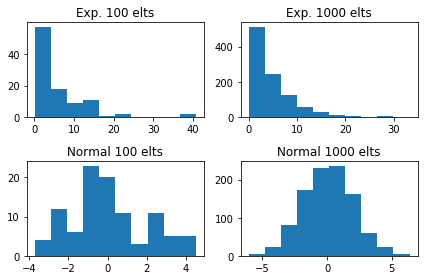

In [58]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(exp_data_100)
axs[0, 0].set_title("Exp. 100 elts")

axs[1, 0].hist(normal_data_100)
axs[1, 0].set_title("Normal 100 elts")

axs[0, 1].hist(exp_data_1000)
axs[0, 1].set_title("Exp. 1000 elts")

axs[1, 1].hist(normal_data_1000)
axs[1, 1].set_title("Normal 1000 elts")
fig.tight_layout()

### Задание 1.4

In [ ]:
def exp_cdf(param_lambda, x):
    return 1 - np.exp(-1*param_lambda*x) if x>=0 else 0

In [ ]:
def exp_pdf(param_lambda, x):
    return param_lambda * np.exp(-1*param_lambda*x) if x>=0 else 0

In [ ]:
def normal_cdf(mu, sigma, x):
    return 0.5*(1 + erf((x-mu)/(sigma*np.sqrt(2))))

In [ ]:
def normal_pdf(mu, sigma, x):
    return (np.exp(-0.5*((x-mu)/sigma)**2)) / (sigma*np.sqrt(2*np.pi))

In [61]:
2**3

8

In [ ]:
exp_theor_x_100 = np.linspace(0,40,100)
exp_theor_x_1000 = np.linspace(0,40,1000)
exp_theor_x_100 = np.linspace(-6,6,100)
exp_theor_x_1000 = np.linspace(-6,6,1000)

In [11]:
l = [["Name", "Age", "University"], ["Hassan", 21, "LUMS"], ["Ali", 22, "FAST"], ["Ahmed", 23, "UET"]]

table = Texttable()
table.add_rows(l)
print(table.draw())

+--------+-----+------------+
|  Name  | Age | University |
+========+=====+============+
| Hassan | 21  | LUMS       |
+--------+-----+------------+
| Ali    | 22  | FAST       |
+--------+-----+------------+
| Ahmed  | 23  | UET        |
+--------+-----+------------+


In [13]:
from tabulate import tabulate

l = [["Hassan", 21, "LUMS"], ["Ali", 22, "FAST"], ["Ahmed", 23, "UET"]]
table = tabulate(l, headers=['Name', 'Age', 'University'], tablefmt='orgtbl')

print(table)

| Name   |   Age | University   |
|--------+-------+--------------|
| Hassan |    21 | LUMS         |
| Ali    |    22 | FAST         |
| Ahmed  |    23 | UET          |


In [15]:
from prettytable import PrettyTable

l = [["Hassan", 21, "LUMS"], ["Ali", 22, "FAST"], ["Ahmed", 23, "UET"]]

table = PrettyTable(['Name', 'Age', 'University'])

for rec in l:
    table.add_row(rec)
    
print(table)

+--------+-----+------------+
|  Name  | Age | University |
+--------+-----+------------+
| Hassan |  21 |    LUMS    |
|  Ali   |  22 |    FAST    |
| Ahmed  |  23 |    UET     |
+--------+-----+------------+


In [59]:
?np.exp